In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pansharpen_utils import brovy, ihs, gram_schmidt_pan, pansharp_pipeline, process_pansharp_img
from utils import load_psf
from utils import get_pansharpening_scores
from utils import evaluate_pansharpening


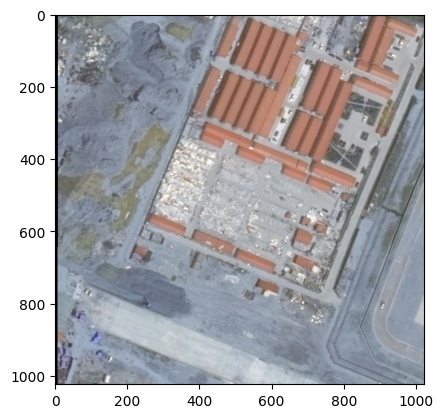

In [2]:
path_to_sample_image = "./sample_images/P0000_0000.png"
img = cv2.imread(path_to_sample_image)
plt.imshow(img)
plt.show()

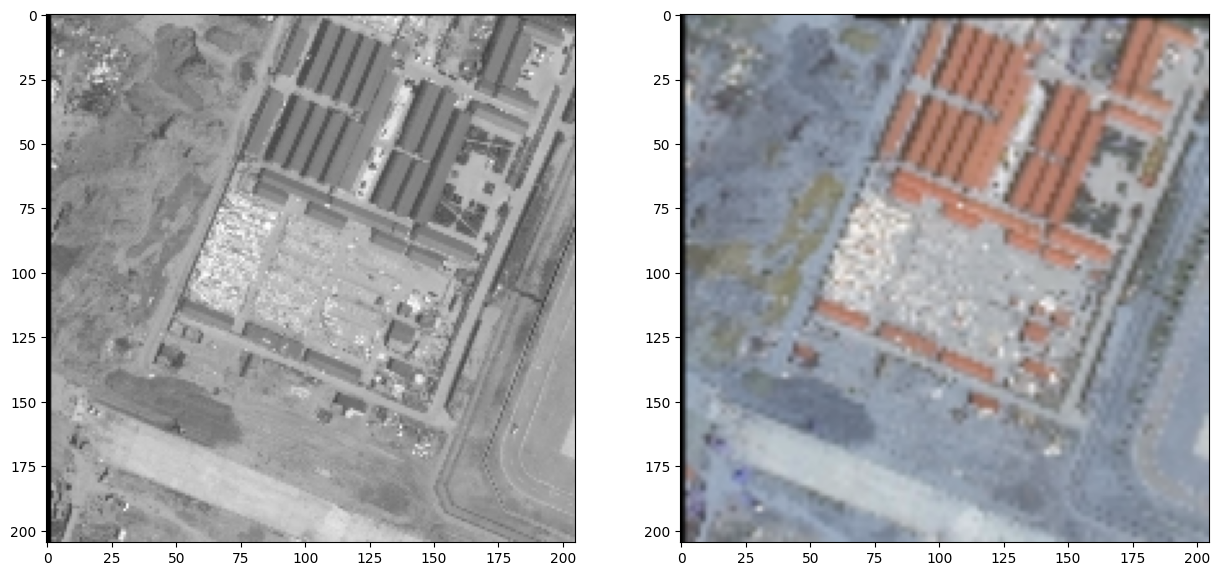

In [3]:
pan_img = cv2.cvtColor(img[::5, ::5, ::], cv2.COLOR_BGR2GRAY)
rgb_img = cv2.resize(img[::10, ::10, ::], (pan_img.shape))
downscaled_img = img[::5, ::5, ::]

plt.figure(figsize=(15, 15))

plt.subplot(1, 2, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(rgb_img)

plt.show()

/home/barbic/Bureau/INSA research project/INSA-research-project/pansharpen_utils.py:18: RuntimeWarning: invalid value encountered in divide
  dnf = pan_img / np.sum(rgb_img * weights, axis=2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/home/barbic/Bureau/INSA research project/myenv/lib/python3.11/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


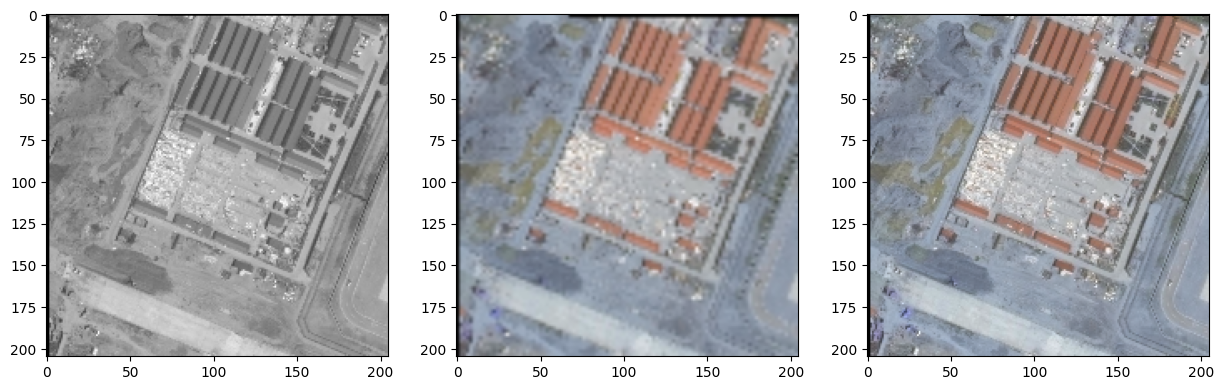

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


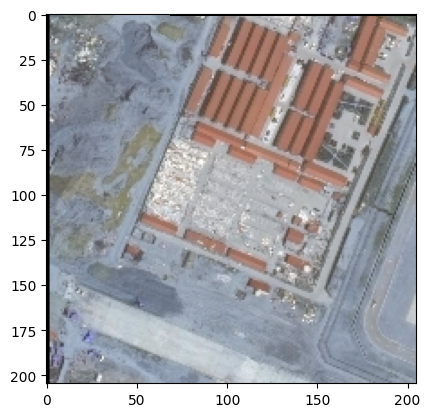

,Score
Pearson,0.993486
SSIM,0.993611
MSE,0.000282


In [4]:
brovy_sharp_img = brovy(pan_img=pan_img, rgb_img=rgb_img)

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(brovy_sharp_img / 255)

plt.show()

plt.imshow(brovy_sharp_img / 255)
plt.show()

get_pansharpening_scores(downscaled_img / 255, brovy_sharp_img / 255)

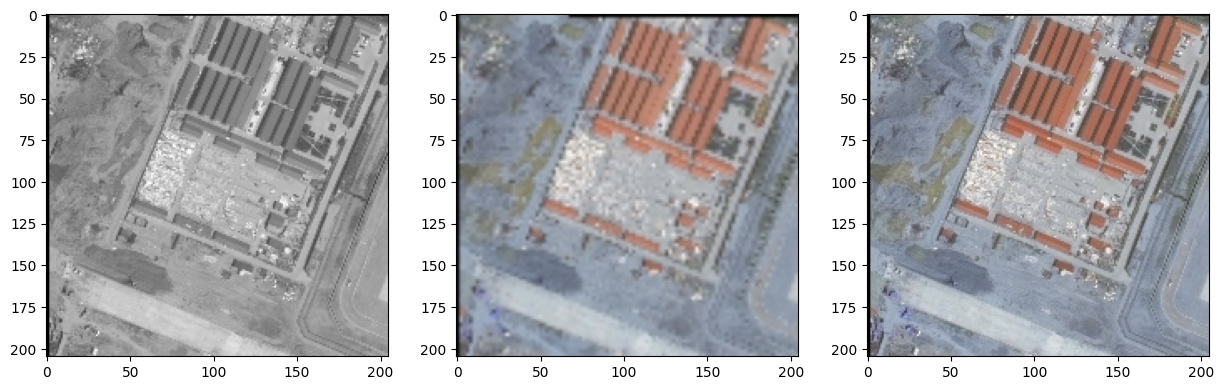

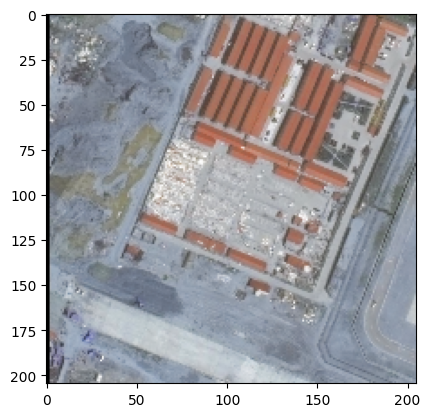

,Score
Pearson,0.988302
SSIM,0.989155
MSE,0.000526


In [5]:
ihs_sharp_img = ihs(pan_img=pan_img, rgb_img=rgb_img)
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(ihs_sharp_img / 255)

plt.show()

plt.imshow(ihs_sharp_img / 255)
plt.show()

get_pansharpening_scores(downscaled_img / 255, ihs_sharp_img / 255)

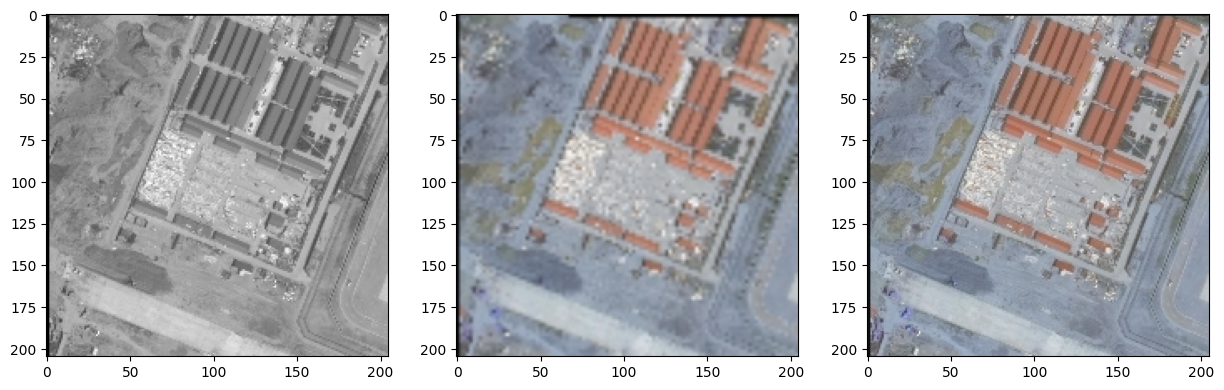

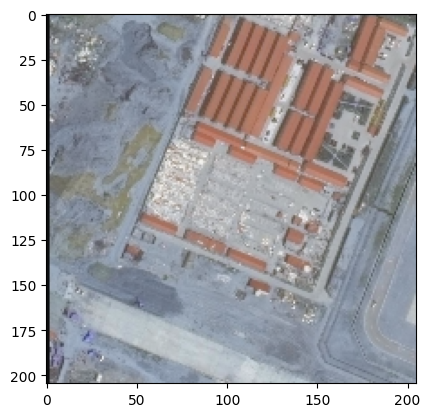

,Score
Pearson,0.994496
SSIM,0.991859
MSE,0.000311


In [6]:
gram_sharp_img = gram_schmidt_pan(pan_img=pan_img, rgb_img=rgb_img, weights=[1, 1, 1])
plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(gram_sharp_img / 255)

plt.show()

plt.imshow(gram_sharp_img / 255)
plt.show()

get_pansharpening_scores(downscaled_img / 255, gram_sharp_img / 255)

In [7]:
psf_path = "../psf"
psf = load_psf(psf_path, sigma_x=5, sigma_y=5, eta=186)
plt.imshow(psf, cmap="gray")
plt.show()

pan_img, rgb_img, sharp_img = pansharp_pipeline(path_to_image=path_to_sample_image, psf=psf, downsampling_factor=5, algorithm=ihs)

plt.figure(figsize=(15, 15))

plt.subplot(1, 3, 1)
plt.imshow(pan_img, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(rgb_img)

plt.subplot(1, 3, 3)
plt.imshow(sharp_img / 255)

plt.show()

plt.imshow(sharp_img / 255)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../psf/5_5_186.npy'

## Compare the time of reading an img to time taken for processing

In [ ]:
img = cv2.imread(path_to_sample_image)

In [ ]:
pan_img, rgb_img, sharp_img = process_pansharp_img(path_to_image=path_to_sample_image, psf=psf)

# Evaluation

In [8]:
import warnings

# Suppress RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)
train_perc = 0.8

In [ ]:
for algorithm in [brovy, ihs, gram_schmidt_pan]:
    print(algorithm)
    print("Train scores:")
    print(evaluate_pansharpening("../data/SOTA/sharp", algorithm=algorithm, train=True, train_perc=train_perc))

    print("Val scores:")
    print(evaluate_pansharpening("../data/SOTA/sharp", algorithm=algorithm, train=False, train_perc=train_perc))

    print("\n ---------------------------------------------------------------- \n")


<function brovy at 0x7f130555fec0>
Train scores:


100%|██████████| 10649/10649 [21:35<00:00,  8.22it/s]


Pearson    0.998055
SSIM       0.961212
MSE        7.128015
dtype: float64
Val scores:


100%|██████████| 2663/2663 [06:28<00:00,  6.85it/s]


Pearson    0.998675
SSIM       0.978831
MSE        6.902757
dtype: float64

 ---------------------------------------------------------------- 

<function ihs at 0x7f130555fce0>
Train scores:


100%|██████████| 10649/10649 [20:58<00:00,  8.46it/s]


Pearson    0.996681
SSIM       0.945919
MSE        9.369620
dtype: float64
Val scores:


100%|██████████| 2663/2663 [05:15<00:00,  8.43it/s]


Pearson    0.997233
SSIM       0.967302
MSE        9.935658
dtype: float64

 ---------------------------------------------------------------- 

<function gram_schmidt_pan at 0x7f1301444360>
Train scores:


100%|██████████| 10649/10649 [21:44<00:00,  8.16it/s] 


Pearson    0.998218
SSIM       0.956176
MSE        3.754179
dtype: float64
Val scores:


100%|██████████| 2663/2663 [05:16<00:00,  8.41it/s]

Pearson    0.998815
SSIM       0.978686
MSE        3.042596
dtype: float64

 ---------------------------------------------------------------- 



In [9]:
for algorithm in [brovy, gram_schmidt_pan]: # ihs
    # print(algorithm)
    # print("Train scores:")
    # print(evaluate_pansharpening("../data/Tiled Pleiades images/sharp", algorithm=algorithm, train=True, train_perc=train_perc))

    print("Val scores:")
    print(evaluate_pansharpening("../data/Tiled Pleiades images/sharp", algorithm=algorithm, train=False, train_perc=train_perc))

    print("\n ---------------------------------------------------------------- \n")

Val scores:


100%|██████████| 1022/1022 [01:26<00:00, 11.85it/s]


Pearson      0.997808
SSIM         0.984564
MSE        153.805616
dtype: float64

 ---------------------------------------------------------------- 

Val scores:


100%|██████████| 1022/1022 [01:34<00:00, 10.77it/s]

Pearson      0.997319
SSIM         0.957926
MSE        177.541926
dtype: float64

 ---------------------------------------------------------------- 

